In [1]:
def train_test(clf, data):
        accu_train = []
        accu_test = []
        loss_train = []
        loss_test = []    
        t_last = []  
        
        train_X, train_Y, test_X, test_Y = data['train_X'], data['train_Y'], data['test_X'], data['test_Y']
        
        for j in range(0, repeat_times):
            t_begin = time.time()

            clf.fit(train_X, train_Y)           

            predict_train_Y = clf.predict(train_X)
            predict_test_Y = clf.predict(test_X)        
            t_last.append(time.time() - t_begin)

            posterior_train_Y = clf.predict_proba(train_X)
            posterior_test_Y = clf.predict_proba(test_X)

            accu_train.append(accuracy_score(predict_train_Y, train_Y))
            accu_test.append(accuracy_score(predict_test_Y, test_Y))

            loss_train.append(log_loss(train_Y, posterior_train_Y, normalize=True))
            loss_test.append(log_loss(test_Y, posterior_test_Y, normalize=True))

        cnf_matrix_train = confusion_matrix(predict_train_Y, data['train_Y'])
        cnf_matrix_test = confusion_matrix(predict_test_Y, data['test_Y'])               

        accu_train = round(np.mean(accu_train), 4)
        accu_test = round(np.mean(accu_test), 4)
        loss_train = round(np.mean(loss_train), 4)
        loss_test = round(np.mean(loss_test), 4)
        t_last = round(np.mean(t_last)*1000, 4)
        
        ''' report train and test error '''
        print('Average training data accuracy:', accu_train)
        print('Average testing data accuracy:', accu_test)

        ''' report train and test log loss'''
        print('Average training data log loss:', loss_train)
        print('Average testing data log loss:', loss_test) 
        print('Average Time ms', t_last)
        
        return accu_train, accu_test, loss_train, loss_test, t_last, cnf_matrix_train, cnf_matrix_test

In [2]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [3]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '--'},
             {'c': 'red', 'linestyle': '-.'},
             {'c': 'green', 'linestyle': '-.'},
             {'c': 'blue', 'linestyle': '-.'}]
labels = ['H=1','H=2','H=3','H=4','H=5','H=6','H=7','H=8','H=9','H=10']

def draw_learning_curve(clfs, i):
    ax = axes.ravel()[i]
    ax.set_title(input_data_filename[i])
    for clf, label, args in zip(clfs, labels, plot_args):
        ax.plot(clf.loss_curve_, label=label, **args)          
    fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")    
    ax.set_xlabel('Training Epochs')
    ax.set_ylabel('Log Loss')        
    
def cross_validation_(data, max_H, i):
    h_scores = np.array([])
    clfs = []
    for H in range(1, max_H):
        clf = MLPClassifier(solver='sgd', activation='logistic', alpha=1e-5, hidden_layer_sizes=H,
                            random_state=0, max_iter=1000, tol=0.0001, learning_rate_init=0.1, 
                            learning_rate='adaptive', verbose=0)
        scores = []
        for j in range(1, 6):        
            train_X, test_X, train_Y, test_Y = train_test_split(data['train_X'], data['train_Y'], 
                                                                test_size=0.2, random_state=None)        
            clf.fit(train_X, train_Y)
            predict_test_Y = clf.predict(test_X) 
            scores.append(accuracy_score(test_Y, predict_test_Y))
        
#         print('H=',H)
#         print(scores)
        h_scores = np.append(h_scores, np.mean(scores))  
        clfs.append(clf)  
        
    draw_learning_curve(clfs, i)    
    print('H scores:',h_scores*100)
    return (np.argmax(h_scores) + 1)


In [4]:
import numpy as np
import csv
def output_csv(result):
    fieldnames = result[0,:]
    with open('experiment_result/neural_network.csv', 'a') as csvfile:   
        resultwriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
        resultwriter.writeheader()
        for i in range(1, result.shape[0]):
            dict = {}
            for j in range(result.shape[1]):
                 dict[result[0,j]] = result[i,j]
            resultwriter.writerow(dict)


In [5]:
# Module 1: setting the parameters
m_i = 1000
c = 0.001
p = "l2"
eta = 0.1
learning_rate = 'adaptive'
repeat_times = 5
file_count = 5
class_names = ['0', '1']
max_H = 11

Reading data from:  breast-cancer
Average training data accuracy: 0.9707
Average testing data accuracy: 0.9706
Average training data log loss: 0.092
Average testing data log loss: 0.0854
Average Time ms 26.4295
m_i 1000 c 0.001 learning rate 0.1 p l2 H 3 a_train 97.07000000000001 a_test 97.06 loss_train 0.092 loss_test 0.0854 time=train+test 26.4295 ms
Confusion matrix, without normalization
Confusion matrix, without normalization
Reading data from:  diabetes
Average training data accuracy: 0.761
Average testing data accuracy: 0.7974
Average training data log loss: 0.4797
Average testing data log loss: 0.4977
Average Time ms 47.3598
m_i 1000 c 0.001 learning rate 0.1 p l2 H 9 a_train 76.1 a_test 79.74 loss_train 0.4797 loss_test 0.4977 time=train+test 47.3598 ms
Confusion matrix, without normalization
Confusion matrix, without normalization
Reading data from:  digit
Average training data accuracy: 0.9887
Average testing data accuracy: 0.95
Average training data log loss: 0.046
Average 

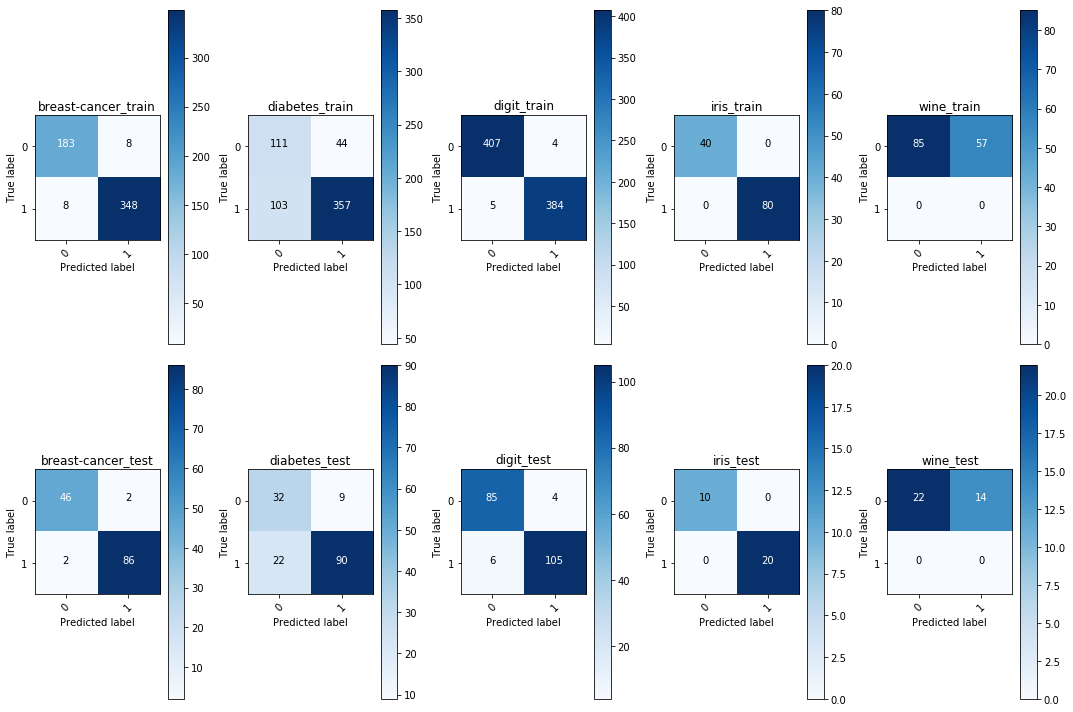

In [6]:
# Module 2: when you get a optimal H, this module could help you to train and test a classifier
import time

import numpy as np
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

# initialize some system value
input_data_filename = ['breast-cancer', 'diabetes', 
                       'digit', 'iris', 'wine']
result = np.array([['Dataset', '$m\_i$', '$c$', '$\eta$', '$p$', 'H', 
                    '$a_{train}(\%)$', '$a_{test}(\%)$', '$l_{train}$', 
                    '$l_{test}$', '$time(ms)$']])

clf = MLPClassifier(solver='sgd', activation='logistic', alpha=1e-5, 
                    random_state=0, max_iter=m_i, tol=c,
                    learning_rate_init=eta, learning_rate=learning_rate, verbose=False)    

H_star = [3,9,10,8,4]

# Create a plot
fig, axes=plt.subplots(2, 5, figsize=(15, 10))

for i in range(0, file_count):
    clf.set_params(hidden_layer_sizes=H_star[i])
    print('Reading data from: ', input_data_filename[i])
    data = np.load('datasets/' + input_data_filename[i] + '.npz')
       
    accu_train, accu_test, loss_train, loss_test, t_last, cnf_matrix_train, cnf_matrix_test = train_test(clf, data)

    ''' report parameters '''
    print('m_i', m_i, 'c', c, 'learning rate', eta, 'p', p, 'H', H_star[i],
          'a_train', accu_train*100, 'a_test', accu_test*100, 
          'loss_train', loss_train, 'loss_test', loss_test, 'time=train+test', t_last, 'ms')

    plt.subplot(2,5,i+1)
    plot_confusion_matrix(cnf_matrix_train, classes=class_names, normalize=False, title=input_data_filename[i]+'_train')
    plt.subplot(2,5,5+i+1)
    plot_confusion_matrix(cnf_matrix_test, classes=class_names, normalize=False, title=input_data_filename[i]+'_test')
    
    #     print('auc', compute_auc(train_Y, posterior_train_Y[:,1]))

    newrow = np.array([[input_data_filename[i], m_i, c, eta, p, H_star[i], accu_train*100, 
                        accu_test*100, loss_train, loss_test, t_last]])
    result = np.append(result, newrow, axis=0)

output_csv(result)                  

plt.savefig('neural_confusion_matrix.eps', dpi=300)        
plt.show()


Parameters:  {'activation': 'logistic', 'alpha': 1e-05, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_iter': 1000, 'momentum': 0.9, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Reading data from:  breast-cancer
H scores: [95.63636364 96.54545455 96.36363636 96.18181818 96.54545455 96.72727273
 96.36363636 96.36363636 96.90909091 95.81818182]
H_star: 9
Reading data from:  diabetes
H scores: [75.93495935 71.38211382 75.44715447 72.84552846 73.00813008 64.3902439
 76.74796748 77.07317073 77.07317073 75.44715447]
H_star: 8
Reading data from:  digit
H scores: [89.75  81.    90.    89.5   90.625 91.5   92.25  90.375 93.875 95.125]
H_star: 10
Reading data from:  iris


/root/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


H scores: [100.         100.         100.         100.         100.
 100.         100.         100.         100.          70.83333333]
H_star: 1
Reading data from:  wine
H scores: [42.06896552 60.         63.44827586 62.06896552 60.68965517 64.13793103
 59.31034483 58.62068966 62.75862069 58.62068966]
H_star: 6


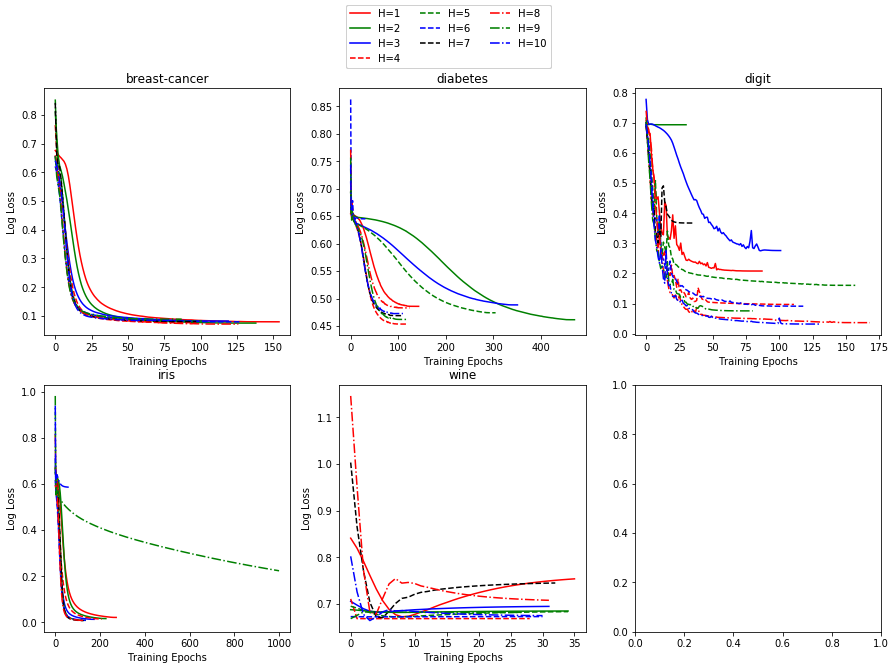

In [7]:
# Module 3: Cross-validation for choosing a optimal H by implementing a cross-validation
import time

import numpy as np
import matplotlib.pyplot as plot

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

# initialize some system value
input_data_filename = ['breast-cancer', 'diabetes', 
                       'digit', 'iris', 'wine']
result = np.array([['Dataset', '$m\_i$', '$c$', '$\eta$', '$p$', 'H', 
                    '$a_{test}(\%)$', '$l_{train}$', '$l_{test}$', '$time(ms)$']])

# Create a mlp classifier
# learning_rate='invscaling', 'adaptive
clf = MLPClassifier(solver='sgd', activation='logistic', alpha=1e-5, 
                    random_state=0, max_iter=m_i, tol=c, learning_rate_init=eta, 
                    learning_rate='adaptive', verbose=False)
print('Parameters: ', clf.get_params(True))

# Create a plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i in range(0, file_count):
    print('Reading data from: ', input_data_filename[i])
    data = np.load('datasets/' + input_data_filename[i] + '.npz')
    
    # cross validataion(80% train, 20% test) for H_star
    H_star = cross_validation_(data, max_H, i)
    print('H_star:', H_star)
    
plt.savefig('H_selection.eps', dpi=600)        
plt.show()